# Konsep Dasar
## Decision Boundary (Hyperplane)
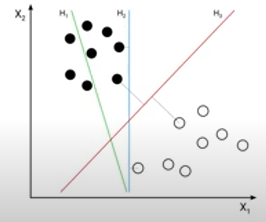

## Maximum Margin
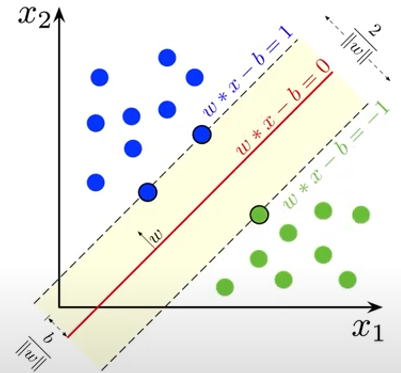

## Linearly Inseperable & Kernel Tricks
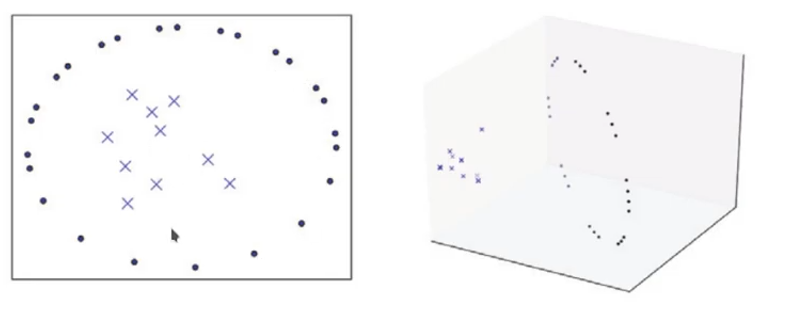

## Dataset: The MNIST database of handwritten digits

In [1]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', data_home = './mnist', return_X_y = True)
X.shape

(70000, 784)

AttributeError: 'str' object has no attribute 'reshape'

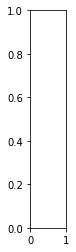

In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

pos = 1
for data in X[:8]:
    plt.subplot(1, 8, pos)
    plt.imshow(data.reshape((28, 28)),cmap = cm.Greys_r)
    plt.axis('off')
    pos += 1
    
plt.show()

In [ ]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

## Classification dengan SVC (Support Vector Classifier) 

In [ ]:
from sklearn.svm import SVC

model = SVC(random_states = 0)
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

## Hyperparameter Tuning dengan `GridSearchCV`

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel' : ['rbf', 'poly', 'signoid'],
    'C' : [0.5, 1, 10, 100],
    'gamma' : ['scale', 1, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator = SVC(random_state = 0),
                          param_grid = parameters,
                          n_jobs = 6, # tergantung processor
                          verbose = 1, # mendapatkan feedback yang informattif
                          scoring = 'accuracy') # nilai pembanding

grid_search,fit(X_train, y_train)

In [ ]:
print(f'Best Score: {grid_search.best_score_}')

best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameters:')
for param in parameters:
    print(f'\t{param}: {best_params[parma]}')

## Predict & Evaluate

In [ ]:
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))